# Conducción de calor con un manantial calorífico de origen nuclear

Considera un elemento de combustible nuclear de forma esférica donde el sistema consta de una esfera de material fisionable de radio R^F revestido de una cubierta esférica de aluminio con un radio externo de R^c. El manantial de energía calorífica que resulta de la fisión nuclear Sn puede representarse con la función parabolica:

$S_n=S_{n0}[1-b(\frac{r}{R^F})^2]$

Donde:

* $Sn_0$ = velocidad volumétrica de producción de calor en el centro de la esféra 
* $b$ = Constante admiensional que toma volumenes entre 0 y 1


## Perfiles obtenidos en la solución de forma analítica
Perfil de distribución en el material fisionable:

$T^f={T_O+\frac{(R^{F})^3}{K_c}Sn_0(\frac{1}{3}-\frac{b}{5})(\frac{1}{R^F}-\frac{1}{R^c})}+\frac{Sn_0}{K^F}[-\frac{r^2}{6}+\frac{b}{20(R^F)^2}r^4 +\frac{(R^F)^2}{6}-\frac{(R^F)^2b}{20}]$


Perfil de distribución de la cubierta:

$T^C=T_O+\frac{R^{F3}}{K_c}Sn_0(\frac{1}{3}-\frac{b}{5})(\frac{1}{r}-\frac{1}{R^c})$

### Tareas a determinar en el ejercicio
**a)** Reproducir los perfiles de Temperatura de ambas esféras para distintos valores $b$ =[0:.1:1] considerando los valores perinentes contantes de los demás parámetros. en base a estos perfiles decir que significado físico puede tener el parámetro b y a que propiedad física del material fisionable pudiera estar relacionada con dicho parámetro.

Notas personales:
- Límite g de calor Sn
- Fundición del aluminio

**b)** Analizar el efecto de cada parámetro 
* $Sn_0$ (Generación de calor en el centro de la esfera)
* $R^F$ (Radio del elemento fisionable)
* $R^C$ (Radio de la cubierta de aluminio)
* $T_0$ (Temperatura en la cubierta)
* $K^F$ (Conductividad del material fisionable)

Notas personales:
- El $K^C$ del aluminio es una propiedad conocida

**c)** En base a los gráficos obtenidos decir bajo que condiciones sería seguro tener el material fisionable operando sin que este ni la cubierta de aluminio lleguen a fundirse , es decir, que siempre se mantengan operando es estado físico solido.

Nota del profesor:
* Utilizar como mínimo 3 materiales Uranio,Plutonio,Torio(Buscar en bibliografía)

## Aspectos a tomar en cuenta

Puntos de fusión:

* $PF_{Aluminio}$ = 934.47 k
* $PF_{Uranio}$ = 1405.15 k
* $PF_{Plutonio}$ = 912.55 k
* $PF_{Torio}$ = 2023.15 k

Conductividad termica:
* $K_{Aluminio}$ = 205.0 $\frac{W}{mK}$
* $K_{Uranio}$ = 27.6  $\frac{W}{mK}$
* $K_{Plutonio}$ = 6.74  $\frac{W}{mK}$
* $K_{Torio}$ = 54.0 $\frac{W}{mK}$







## Valores considerados 

$Sn_0=1*10^6$

# Código

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import fabs

In [305]:
# Condiciones del ambiente
T0 = 863.15 # Temperatura mas común del refrigerante sin considerar capa limite termica
Rf = 0.1 #.25 # Radio del material fisionable, medio metro
Rc = 1 # Radio del material de cubierta

Aluminio = {
    'Symbol': "Al",
    'PF':934.47,
    'K':205.0,
}

Torio = {
    'Symbol': "Th",
    'PF' : 2023.15,
    'K' : 54.0,
    'Sn0' : 161.4*10**6
}

Uranio = {
    'Symbol': "U",
    'PF' : 1405.15,
    'K' : 27.6, 
    'Sn0' : 2*10**8
}

Plutonio = {
    'Symbol': "Pu",
    'PF' : 912.55,
    'K' : 6.74,
    'Sn0' : 11.1*10**6
}

In [306]:
def tempFisionable(T0,Rf,Rc,r,b,Fisionable,Cubierta):
    
    A1 = ((Rf**3)/Cubierta['K']) * Fisionable['Sn0'] * ((1/3)-(b/5)) * ((1/Rf)-(1/Rc))
    A2 = (Fisionable['Sn0']/Fisionable['K']) * ( (-(r**2)/6) + ( ( b*(r**4) )/( 20*(Rf**2 )) ) + ((Rf**2)/6) - ((Rf**2)*b)/20)
    Tf = T0 + A1 + A2
    
    return Tf

def tempCubierta(T0,Rf,Rc,r,b,Fisionable,Cubierta):
    Tc = T0 + ((Rf**3)/Cubierta['K']) * Fisionable['Sn0'] * ((1/3)-(b/5)) * ((1/r)-(1/Rc))
    return Tc

def analisisSistema(T0,Rf,Rc,Fisionable,Cubierta):
    t = 0.001
    r = np.arange(0,Rf+Rc+t,t)
    b = np.arange(0,1.1,.1)
    
    for Cb in b:
        TS=[]
        for Cr in r:
            if Cr <= Rf:
                TS.append(tempFisionable(T0,Rf,Rc,Cr,Cb,Fisionable,Cubierta))
            else:
                TS.append(tempCubierta(T0,Rf,Rc,Cr,Cb,Fisionable,Cubierta))
                
        plt.plot(r,TS,'-',label=round(Cb,2))
        plt.axvline(x=Rf,ls="dotted",color = 'blue')
        plt.axhline(y=T0,ls="dotted",color = 'green')
        plt.axhline(y=Fisionable['PF'],ls="dotted",color = 'red')
        plt.axhline(y=Cubierta['PF'],ls="dotted",color = 'orange')
        plt.title(f"Variación del parámetro B\npara el {Fisionable['Symbol']}")
        plt.grid()
        plt.xlabel('Radio (m)')
        plt.ylabel('Temperatura (k)')
        plt.legend()
    plt.show() 
    pass    

## a) Perfiles de Temperatura
Para esta simulación se trataron condiciones en las cuales no se superaran los puntos de fusión del material fisionable dentro de su radio o del material de cubierta igualmente. Se planteo la siguiente notación de lineas punteadas:

* **Amarilla:** La linea amarilla representa el Punto de fusión del material de la cubierta.
* **Roja:** La linea roja marca el punto de fusión del material fisionable.
* **Verde:** Representa la temperatura de la cubierta o la temperatura en equilibrio fuera del sistma.
* **Azul:** Interfáz entre el radio del fisionable y el radio de cubierta.

Así se obtuvieron valores de referencia que serán usados mas tarde.

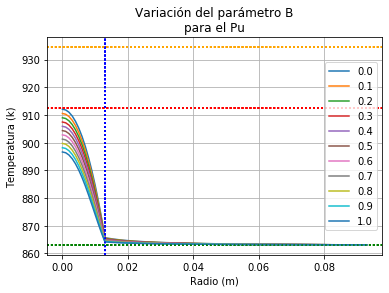

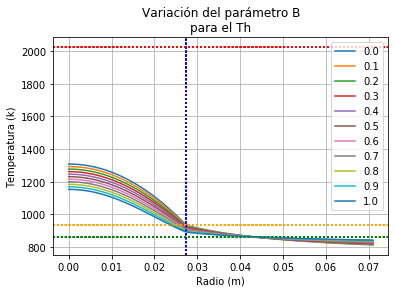

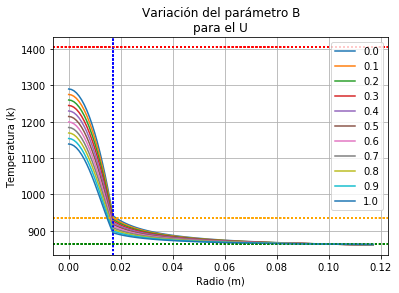

In [335]:
analisisSistema(T0,.013,.08,Plutonio,Aluminio)
analisisSistema(T0,.0274,.043,Torio,Aluminio)
analisisSistema(T0,.017,.1,Uranio,Aluminio)

##  Que significado físico 
Puede tener el parámetro b y a que propiedad física del material fisionable pudiera estar relacionada con dicho parámetro?

* El parámetro **b** va ligado directamente a la temperatura del material fisionable, mientras mas pequeño es el valor de b la temperatura llega a ser mas alta, por lo que puede ser un factor de corrección o algo similar.

* La propiedad física relacionada con el mismo puede ser como una barrera limintante para la generación de calor, quizá podria ir ligada al tipo de isotopo o a la pureza

## **b)** Analizar el efecto de cada parámetro 

* $Sn_0$: La velocidad de generación volumétrica de calor, propiedad característica de cada material fisionable, está relacionada directmente con la cantidad de calor que este genera cuando se fisiona, llega a tener valores demasiado altos, midiendose en MW sin embargo es un dato difícil e encontrár en la biblíografía.

En condiciones de radios similares pero solo ilustrativas se puede ver que gracias a este parámetro el potencial de generación de temperatura es muy diferente, si tomamos en cuenta el Plutonio con el Torio este ultimo tiene un valor de *Sn0* mucho mayor llegando a alcanzar temperaturas por arriba delos 8000k en comparacion con los 4000k que alcanzaríamos con el plutonio

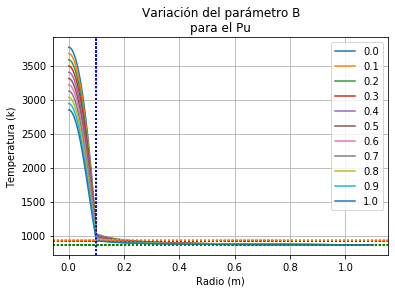

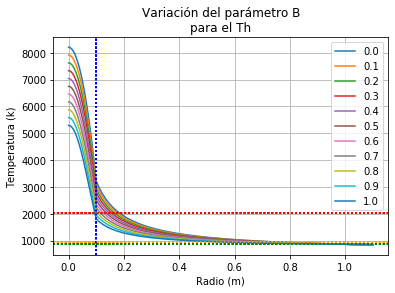

In [334]:
analisisSistema(T0,.1,1,Plutonio,Aluminio)
analisisSistema(T0,.1,1,Torio,Aluminio)

* $R^F$: El radio del elemento fisionable responsable indirecto de la cantidad de calor que se producirá, dependiento del volumen total será la cantidad de calor que se produzca, siendo esto muy importante para no exceder los límites de volumen permitidos y que no se genere una catástrofe.

Tomando la función para dos mismos elementos pero con diferente valor en los radios podemos encontrar correlaciones bastante interesantes. A un mayor Rf tenemos una generación de temperatura mucho mayor, sin embargo los valores de nuestro Rc deben de cambiar con este para no alcanzar una zona de temperatura de riesgo, creo en lo personal que uno de los límites para las condiciones de operación de estos sisemas es cuanto material fisionable puedas conseguir o que puedas manejar dentro de parámetros seguros. En este ejemplo la variación del radio fue de apenas 0.003 y tuvimos un cambio de mas de 1000K 

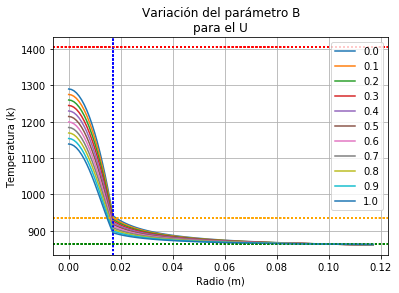

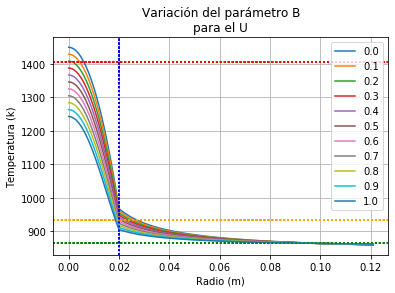

In [342]:
analisisSistema(T0,.017,.1,Uranio,Aluminio)
analisisSistema(T0,.02,.1,Uranio,Aluminio)

* $R^C$: El Radio de la cubierta de aluminio tiene la función de ser una zona en la que se transfiere el calor al medio  refrigerante y que este ultimo no esté en contacto directo con el medio, según el modelo obtenido no es posible que el radio del material fisionable sea mayor al de la cubierta.

Este parámetro influye principalmente en la disipación de calor del material fisionable al medio donde este se encuentre sumergido, cuenta con algunas variaciones en la temperatura del material fisionable pero su principal funcion es proteger el sistema del material fisionable y disipar el calor de una manera mas eficiente. Un detalle que se observó es que en el modelo cuando el radio del material de cubierta es menor al fisionable empiezan a ocurrir discrepancias en nuestras gráficas.

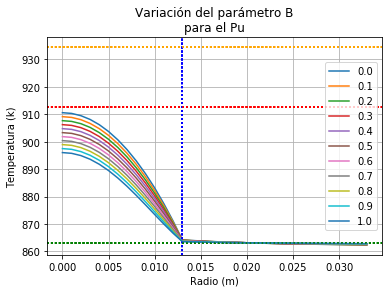

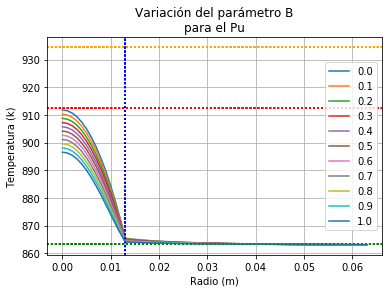

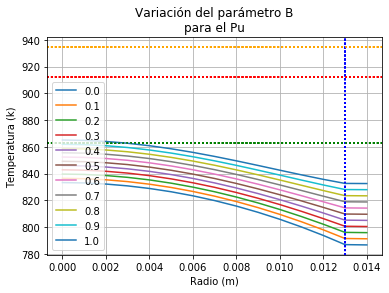

In [356]:
analisisSistema(T0,.013,.02,Plutonio,Aluminio)
analisisSistema(T0,.013,.05,Plutonio,Aluminio)
analisisSistema(T0,.013,.0005,Plutonio,Aluminio)

* $T_0$ Para la temperatura en la cubierta se consideró la temperatura promedio a la que se encuentran los refrigerantes en los que se sumergen este tipo de materiales, aunque puede que esto no sea del todo correcto, ya que el elemento que genera el calor es el material fisionable, este calor viaja através de la cubierta y llega así a su capa exterior donde despues se dispersa hacia el refrigerante.

Dependiendo de la capacidad del refrigerante en nuestro sistema influye muchísimo la temperatura del sistema donde se encuentre, en otras palabras la temperatura de la cubierta, ya que este ayuda en la facilidad o no con la que un sistema alcanza temperaturas altas.


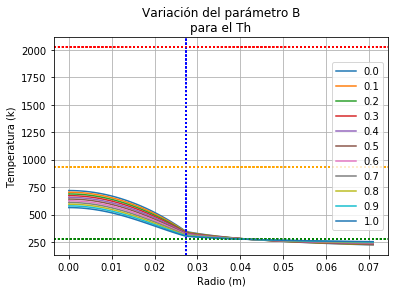

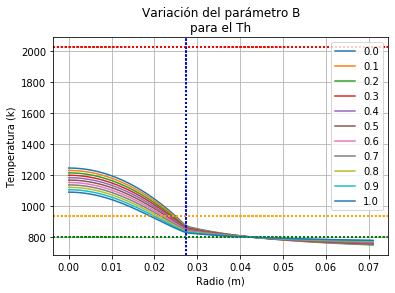

In [361]:
analisisSistema(273.15,.0274,.043,Torio,Aluminio)
analisisSistema(800,.0274,.043,Torio,Aluminio)

* $K^F$ La conductividad del material fisionable responsable directamente del transporte del calor en este material, mas allá del calor generado una buena conductividad(Valores altos) aseguran que el calor generado sea facilmente transportado através del radio de este material al la cubierta correspondiente.

Quizá uno de los parámetros mas dificiles de observar, la conductividad térmica indica el transporte de calor y su facilidad con el medio, si comparamos el Plutonio y el Uranio con el aluminio (Todos estos con K diferentes) podemos notar una diferencia muy significativa en la forma que el calor se conduce, notando que el parámetro del K en el aluminio es mucho mayor ya que el calor e conserva con mayor facilidad desde el inicio hasta el final del radio.

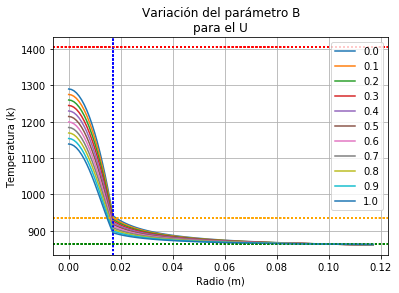

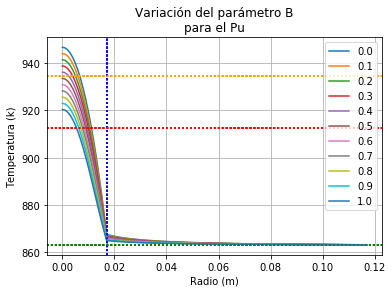

In [362]:
analisisSistema(T0,.017,.1,Uranio,Aluminio)
analisisSistema(T0,.017,.1,Plutonio,Aluminio)

## **c)** En base a los gráficos obtenidos
Decir bajo que condiciones sería seguro tener el material fisionable operando sin que este ni la cubierta de aluminio lleguen a fundirse , es decir, que siempre se mantengan operando es estado físico solido.

Retomando las primeras tres graficas realizadas, hay algunos aspectos a tomar en cuenta para una correcta operación de este tipo de sistemas:

* La temperatura del lado del material fisionable nunca puede sobrepasar el punto de fusión del material fisionable, puede sobrepasar el punto de fusión del material de cubierta siempre y cuando esto sea cercano al centro de las esferas y no cuando se aproxima al inicio del radio de cubierta, un caso bien interesante es el del Plutonio, donde su punto de fusión es menor al del aluminio, entonces despues de la interfáz Rf-Rc no se alcanzan temperaturas de riesgo para la integridad del sistema.

* La temperatura de la cubierta no puede sobrepasar el punto de fusión del material de la cubierta. Usualmente este material tiene a alcanzar el equilibrio con la temperatura del ambiente, por lo que el punto crítico ocurre en la interfáz Rf-Rc. Se busca mantener valores or debajo de las lineas amarillas y por encima de las lineas verdes, asegurando un intervalo de funcionamiento seguro.

* La temperatura de cualquiera de los sistemas no puede ser menor a la T0, si esto ocurre indicaría un error, para nuestro modelo esto puede ocurrir ya que consideramos que el flujo de calor es unidireccional en r positivo pero en la realidad esto no sucede.

* Otro punto interesante a tomar en cuenta sería la producción de radiación del equipo y como se relaciona con el volumen del sistema pero no es tema de estudio de este problema.

| Elemento | Tmax(K)  | 
| -------- |----------| 
| Plutonio | 912.55   | 
| Uranio   | 1405.15  | 
| Torio    | 2023.15  | 
| Aluminio | 934.47   |  


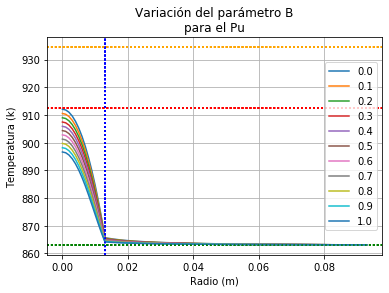

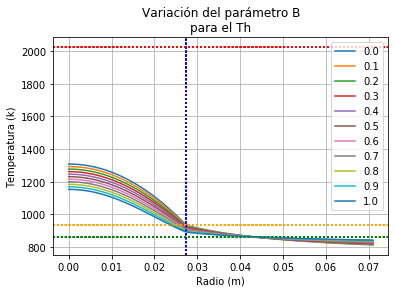

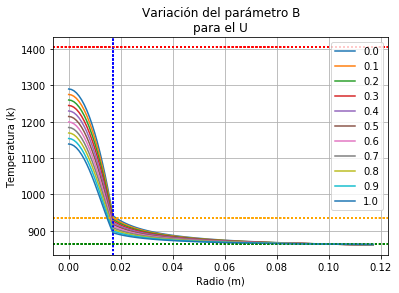

In [363]:
analisisSistema(T0,.013,.08,Plutonio,Aluminio)
analisisSistema(T0,.0274,.043,Torio,Aluminio)
analisisSistema(T0,.017,.1,Uranio,Aluminio)

## Conclusiones

Realizar este tipo de ejercicios a nivel industrial permite ahorarse muchisimo dinero en material así como en terminos de seguridad. Hubo varios detalles que me llamaron la atención, como la variación de parametros entre los radios ya que a mi parecer son los unicos valores que podemos cambiar realmente, las demás son propiedades ya fijas de los materiales, debe de existir una relación específica entre radios que permita el meyor aprovechamiento de temperatura pero de una forma segura, sin embargo a groso modo pude deducir que según el modelo siempre se debe cumplir que Rc>=Rf si no el modelo empieza a realizar cosas extrañas. Existen otros limites de operación como la temperatura ambiente, temperatura de cubierta o T0, si nuestros valores fueran menores a esta entonces tendriamos un error considerable. 

Otro aspecto importante es checar que la temperatura en las fronteras si sea la misma aunque su comportamiento gracias a la K de cada material sea direfente, esto solo indica la capacidad de transferir calor de cada material, mucho mayor en la cubierta que en el fisionable por cierto.